In [1]:
# allow to import modules from the project root directory
import sys
import os

# Add the project root directory to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [2]:
from src.data import fetch_features

X_train, y_train, X_test = fetch_features(name="features_target_train_test",version='v1.0')
len(X_train), len(X_test), len(y_train)

(7613, 3263, 7613)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from src.data import read_datastore
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, RocCurveDisplay, roc_curve, auc, precision_recall_curve, PrecisionRecallDisplay


def print_metrics(X, y, model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(model)
    print(classification_report(y_test, y_pred))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    fig, axs = plt.subplots(1, 2)
    roc_auc_curve = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=f'{type(model).__name__}')
    roc_auc_curve.plot(axs[0])
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    pre_rec_curve = PrecisionRecallDisplay(precision=precision, recall=recall)
    pre_rec_curve.plot(axs[1])
    fig.tight_layout()
    plt.show()

def prepare_submission(X_train, y_train, X_test, model):
    model.fit(X_train, y_train)
    target = model.predict(X_test)
    test, _ = read_datastore(train=False)
    test['target'] = pd.Series(data=target)
    test.drop(columns=['keyword', 'location', 'text']).to_csv('submission.csv', index=False)

LogisticRegression()
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       874
           1       0.98      0.93      0.95       649

    accuracy                           0.96      1523
   macro avg       0.96      0.96      0.96      1523
weighted avg       0.96      0.96      0.96      1523



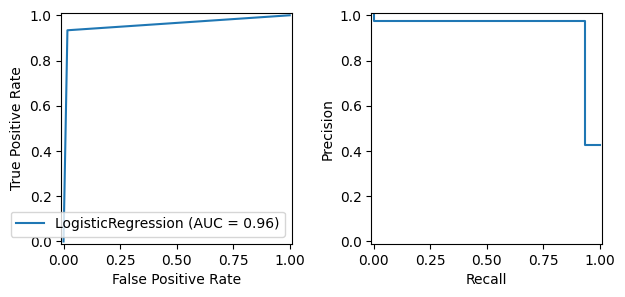

BernoulliNB()
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       874
           1       0.98      0.93      0.95       649

    accuracy                           0.96      1523
   macro avg       0.96      0.96      0.96      1523
weighted avg       0.96      0.96      0.96      1523



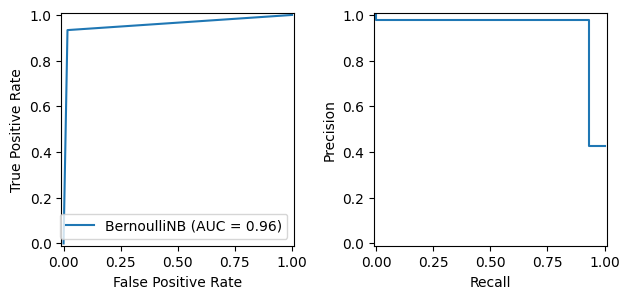

SVC()
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       874
           1       0.98      0.93      0.95       649

    accuracy                           0.96      1523
   macro avg       0.96      0.96      0.96      1523
weighted avg       0.96      0.96      0.96      1523



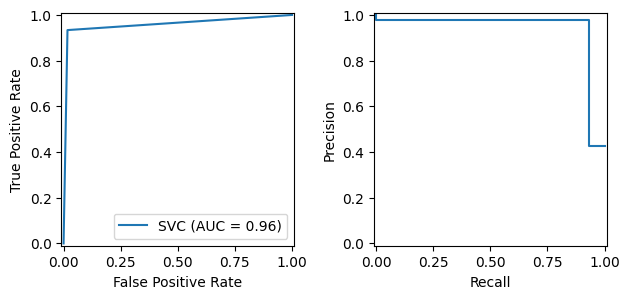

SVC(kernel='linear')
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       874
           1       0.98      0.93      0.95       649

    accuracy                           0.96      1523
   macro avg       0.96      0.96      0.96      1523
weighted avg       0.96      0.96      0.96      1523



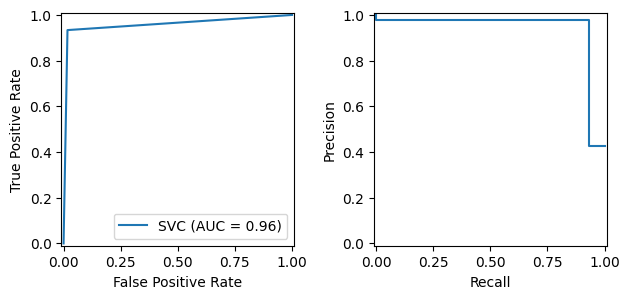

RandomForestClassifier(max_depth=3, random_state=0)
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       874
           1       0.97      0.93      0.95       649

    accuracy                           0.96      1523
   macro avg       0.96      0.96      0.96      1523
weighted avg       0.96      0.96      0.96      1523



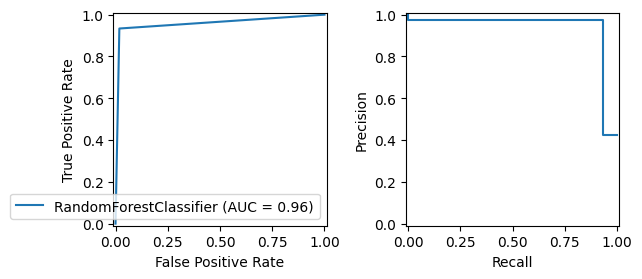

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

print_metrics(X_train, y_train, LogisticRegression())
print_metrics(X_train, y_train, BernoulliNB())
print_metrics(X_train, y_train, SVC(kernel='rbf'))
print_metrics(X_train, y_train, SVC(kernel='linear'))
print_metrics(X_train, y_train, RandomForestClassifier(max_depth=3, random_state=0))
# prepare_submission(X_train, y_train, X_test, RandomForestClassifier(max_depth=10, random_state=0))